In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,BisectingKMeans,Birch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [3]:
input_file = "rationalized_data.xlsx"
df = pd.read_excel(input_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111651 entries, 0 to 111650
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   region              111651 non-null  object        
 1   system              111651 non-null  object        
 2   parameter           111651 non-null  object        
 3   health_guideline    15194 non-null   float64       
 4   average_value       111651 non-null  float64       
 5   health_compliance   111651 non-null  float64       
 6   disinfection        111541 non-null  object        
 7   end_date            110479 non-null  datetime64[ns]
 8   LastDate            110479 non-null  datetime64[ns]
 9   Year                110479 non-null  float64       
 10  rationalized_value  111651 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 9.4+ MB


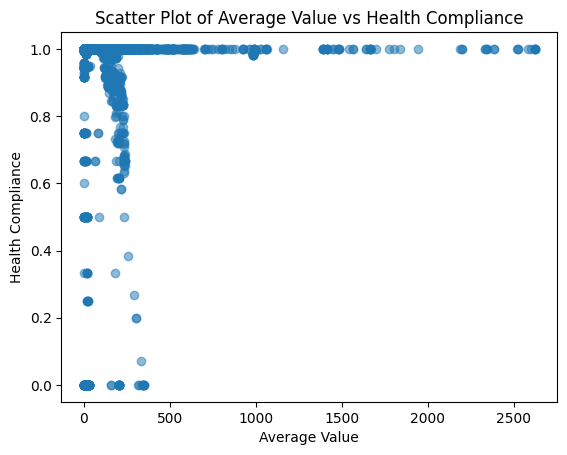

In [4]:
df.info()
plt.scatter(df['average_value'], df['health_compliance'], alpha=0.5)
plt.title('Scatter Plot of Average Value vs Health Compliance')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')
plt.show()

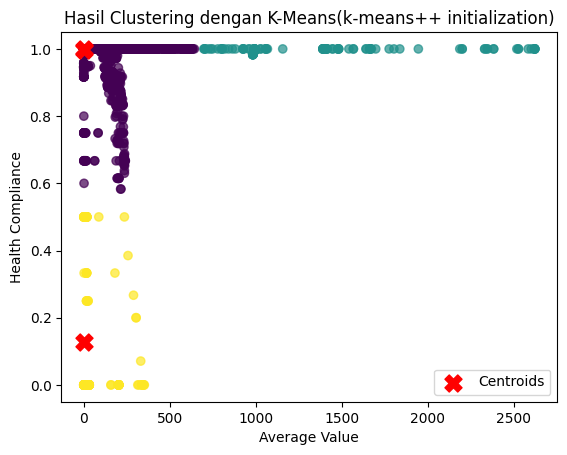

In [5]:
kmdf = df
K = 3
# Pilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['rationalized_value', 'health_compliance']

# Lakukan standardization pada fitur yang akan digunakan untuk clustering
scaler = MinMaxScaler()
kmdf[columns_for_clustering] = scaler.fit_transform(kmdf[columns_for_clustering])

# Pilih fitur-fitur yang akan digunakan untuk clustering
features_for_clustering = kmdf[columns_for_clustering]

# Lakukan clustering dengan K-Means using k-means++ initialization
kmeans = KMeans(n_init='auto',init='k-means++',n_clusters=K, random_state=42)
kmdf['cluster'] = kmeans.fit_predict(features_for_clustering)

# Plot hasil clustering
plt.scatter(kmdf['average_value'], kmdf['health_compliance'], c=kmdf['cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.title('Hasil Clustering dengan K-Means(k-means++ initialization)')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')
plt.legend()
plt.show()

In [6]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming you have features_for_clustering as your feature matrix
# # and kmeans is already fitted

# # Get cluster labels
# cluster_labels = kmeans.labels_

# # Calculate silhouette score
# silhouette = silhouette_score(features_for_clustering, cluster_labels)

# # Calculate Davies-Bouldin score
# davies_bouldin = davies_bouldin_score(features_for_clustering, cluster_labels)

# # Calculate Calinski-Harabasz score
# calinski_score = calinski_harabasz_score(features_for_clustering, cluster_labels)

# # Create a table to compare the scores
# scores_table = {
#     "Silhouette Score": [silhouette],
#     "Davies-Bouldin Score": [davies_bouldin],
#     "Calinski-Harabasz Score": [calinski_score]
# }

# # Convert the dictionary to a DataFrame
# import pandas as pd
# scores_df = pd.DataFrame(scores_table)

# print(scores_df)


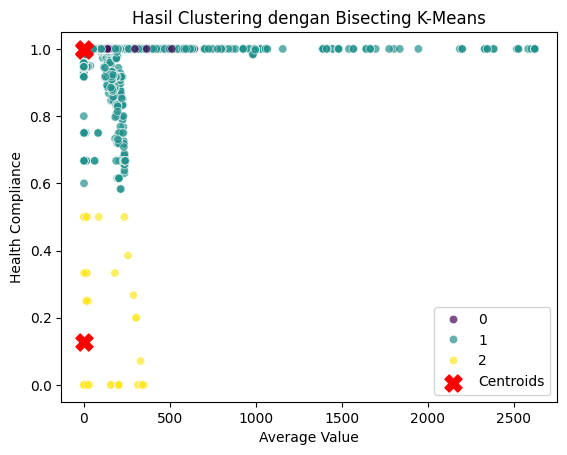

In [7]:
bskmdf = df.copy()
K = 3
# Pilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['rationalized_value', 'health_compliance']

# Lakukan standardization pada fitur yang akan digunakan untuk clustering
scaler = MinMaxScaler()
bskmdf[columns_for_clustering] = scaler.fit_transform(bskmdf[columns_for_clustering])

# Pilih fitur-fitur yang akan digunakan untuk clustering
features_for_clustering = bskmdf[columns_for_clustering]

# Lakukan clustering dengan Bisecting K-Means
biskmeans = BisectingKMeans(n_clusters=K, random_state=42)
bskmdf['cluster'] = biskmeans.fit_predict(features_for_clustering)

# Plot hasil clustering
sns.scatterplot(x='average_value', y='health_compliance', data=bskmdf, hue='cluster', palette='viridis', alpha=0.7)
plt.scatter(biskmeans.cluster_centers_[:, 0], biskmeans.cluster_centers_[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.title('Hasil Clustering dengan Bisecting K-Means')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')
plt.legend()
plt.show()

In [8]:
# from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# # Assuming you have features_for_clustering as your feature matrix
# # and kmeans is already fitted

# # Get cluster labels
# cluster_labels = biskmeans.labels_

# # Calculate silhouette score
# silhouette = silhouette_score(features_for_clustering, cluster_labels)

# # Calculate Davies-Bouldin score
# davies_bouldin = davies_bouldin_score(features_for_clustering, cluster_labels)

# # Calculate Calinski-Harabasz score
# calinski_score = calinski_harabasz_score(features_for_clustering, cluster_labels)

# # Create a table to compare the scores
# scores_table = {
#     "Silhouette Score": [silhouette],
#     "Davies-Bouldin Score": [davies_bouldin],
#     "Calinski-Harabasz Score": [calinski_score]
# }

# # Convert the dictionary to a DataFrame
# import pandas as pd
# scores_df = pd.DataFrame(scores_table)

# print(scores_df)

In [9]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import MinMaxScaler

# # Mengasumsikan 'df' adalah dataframe asli Anda
# # input_file = "rationalized_data.xlsx"
# # df = pd.read_excel(input_file)
# # Pilih kolom untuk clustering
# columns_for_clustering = ['rationalized_value', 'health_compliance']

# # Pilih ukuran sampel yang sesuai dengan batasan memori
# sample_size = 50000  # Anda bisa menyesuaikan ukuran sampel sesuai kebutuhan

# # Buat sampel dari data
# df_sample = df.sample(n=sample_size, random_state=42)

# # Buat dataframe baru untuk clustering dengan DBSCAN
# dbscan_df = df_sample.copy()

# # Lakukan clustering dengan DBSCAN
# # Anda dapat menyesuaikan parameter (eps dan min_samples) berdasarkan data dan kebutuhan Anda
# dbscan = DBSCAN(eps=0.3, min_samples=5, algorithm='kd_tree', n_jobs=-1)
# dbscan_df['cluster'] = dbscan.fit_predict(dbscan_df[columns_for_clustering])



# # Plot hasil clustering dengan DBSCAN
# sns.scatterplot(x='average_value', y='health_compliance', data=dbscan_df, hue='cluster', palette='viridis', alpha=0.7)
# plt.title('Hasil Clustering dengan DBSCAN')
# plt.xlabel('Average Value')
# plt.ylabel('Health Compliance')

# # Tambahkan markah untuk representasi pusat cluster (centroids)
# centroids = dbscan_df.groupby('cluster')[columns_for_clustering].mean().values
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=150, label='Centroids')
# plt.legend()

# plt.show()

In [11]:
# Aglomerative Cluster

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Mengasumsikan 'df' adalah dataframe asli Anda

# Pilih kolom untuk clustering
columns_for_clustering = ['average_value', 'health_compliance']

# Pilih ukuran sampel yang sesuai dengan batasan memori
sample_size = 50000  # Anda bisa menyesuaikan ukuran sampel sesuai kebutuhan

# Buat sampel dari data
df_sample = df.sample(n=sample_size, random_state=42)

# Buat dataframe baru untuk clustering dengan Agglomerative Clustering
agg_df = df_sample.copy()

# Lakukan clustering dengan Agglomerative Clustering
# Anda dapat menyesuaikan parameter (n_clusters dan linkage) berdasarkan data dan kebutuhan Anda
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_df['cluster'] = agg_clustering.fit_predict(agg_df[columns_for_clustering])


# Plot hasil clustering dengan Agglomerative Clustering
sns.scatterplot(x='average_value', y='health_compliance', data=agg_df, hue='cluster', palette='viridis', alpha=0.7)
plt.title('Hasil Clustering dengan Agglomerative Clustering')
plt.xlabel('Average Value')
plt.ylabel('Health Compliance')

# Tambahkan markah untuk representasi pusat cluster (centroids)
centroids = agg_df.groupby('cluster')[columns_for_clustering].mean().values
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=150, label='Centroids')
plt.legend()

plt.show()

: 